In [2]:
import manim as mm

mm.config.frame_rate = 30
mm.config.pixel_height = 1080
mm.config.pixel_width = 1440

Manim Community v0.17.3

# Intro

Bellow code generates the intro animation of the title of the talk.

In [11]:
%%manim -v WARNING Intro

class Intro(mm.Scene):
    def construct(self):
        text = mm.MathTex(r"\begin{bmatrix} Fast & Matrix \\ Multiplication & Algorithms \end{bmatrix}")
        self.play(mm.Write(text, run_time = 2))
        self.wait(2)

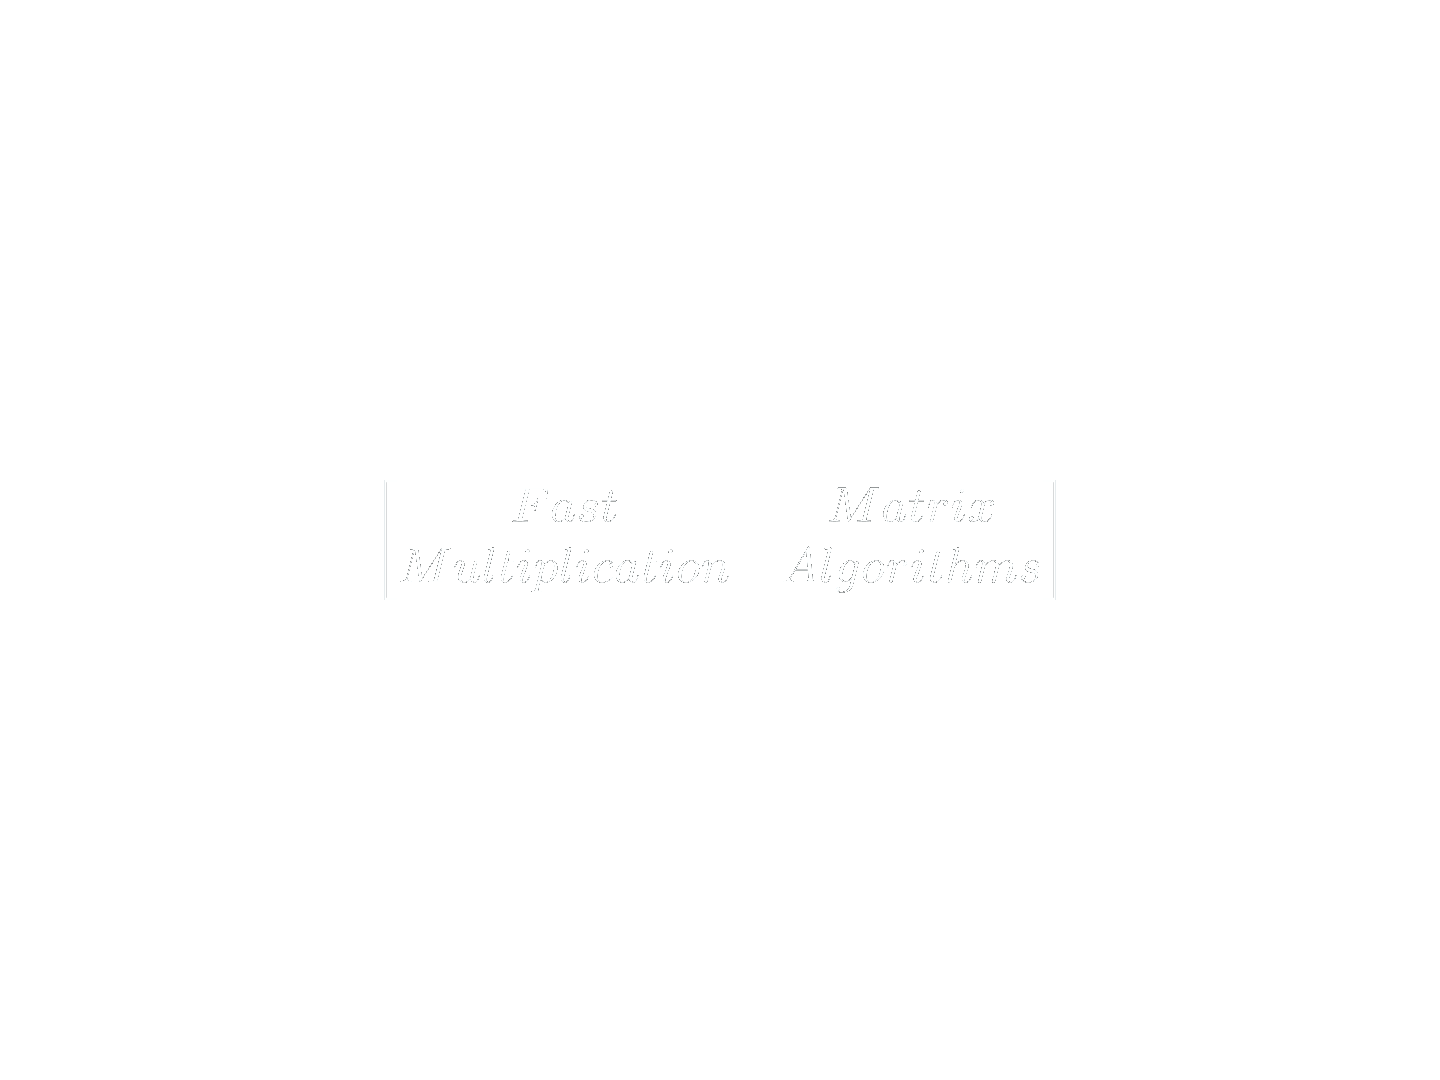

In [12]:
%%manim --format=gif -t -v WARNING Banner

class Banner(mm.Scene):
    def construct(self):
        text = mm.MathTex(r"\begin{bmatrix} Fast & Matrix \\ Multiplication & Algorithms \end{bmatrix}")
        self.add(text)
        self.wait(5)
        self.play(mm.Indicate(text, color= mm.BLUE, scale_factor= 1.12, run_time = 3))

# Explanation of Matrix

In [32]:
%%manim -v WARNING WhatIsMatrix

class WhatIsMatrix(mm.Scene):
    def construct(self):
        mat = mm.MathTex(r"""A =
                         \begin{bmatrix}
                            a_{11} & a_{12} \\
                            a_{21} & a_{22}
                         \end{bmatrix}_{2\times 2}""")
        mat2= mm.MathTex(r"""A =
                         \begin{bmatrix}
                            a_{11} & a_{12} & a_{13} & a_{14} \\
                            a_{21} & a_{22} & a_{23} & a_{24} \\
                            a_{31} & a_{32} & a_{33} & a_{34} \\
                         \end{bmatrix}_{3\times 4}""")
        mat3= mm.MathTex(r"""A =
                         \begin{bmatrix}
                            a_{11} & a_{12} & a_{13} & a_{14} & \cdots & a_{1n} \\
                            a_{21} & a_{22} & a_{23} & a_{24} & \cdots & a_{2n} \\
                            a_{31} & a_{32} & a_{33} & a_{34} & \cdots & a_{3n} \\
                            a_{41} & a_{42} & a_{43} & a_{44} & \cdots & a_{4n} \\
                            \vdots & \vdots & \vdots & \vdots & \ddots & \vdots \\
                            a_{m1} & a_{m2} & a_{m3} & a_{m4} & \cdots & a_{mn}
                         \end{bmatrix}_{m\times n}""")
        mat .scale(2.4)
        mat2.scale(2)
        mat3.scale(1.4)
        self.play(mm.Write(mat))
        self.wait(2)
        self.play(mm.ReplacementTransform(mat, mat2))
        self.wait(2)
        self.play(mm.ReplacementTransform(mat2, mat3))
        self.wait(2)

In [10]:
%%manim -v WARNING MatMulti

class MatMulti(mm.Scene):
    def construct(self):
        AcrossB  = mm.VGroup(mm.MathTex(r"""[ \begin{array}{c}
                            \\
                            \\
                            \\
                            \\
                            \\
                            \\
                            \text{}
                        \end{array} .""", r"""
                        \begin{array}{cccccc}
                            a_{11} & a_{12} & a_{13} & a_{14} & \cdots & a_{1n} \\
                            a_{21} & a_{22} & a_{23} & a_{24} & \cdots & a_{2n} \\
                            a_{31} & a_{32} & a_{33} & a_{34} & \cdots & a_{3n} \\
                            a_{41} & a_{42} & a_{43} & a_{44} & \cdots & a_{4n} \\
                            \vdots & \vdots & \vdots & \vdots & \ddots & \vdots \\
                            a_{m1} & a_{m2} & a_{m3} & a_{m4} & \cdots & a_{mn}
                        \end{array}""", r""". \begin{array}{c}
                            \\
                            \\
                            \\
                            \\
                            \\
                            \\
                            \text{}
                        \end{array} ]""", r"\times", r"""[ \begin{array}{c}
                            \\
                            \\
                            \\
                            \\
                            \\
                            \\
                            \text{}
                        \end{array} .""",  r"""
                        \begin{array}{cccccc}
                            b_{11} & b_{12} & b_{13} & b_{14} & \cdots & b_{1o} \\
                            b_{21} & b_{22} & b_{23} & b_{24} & \cdots & b_{2o} \\
                            b_{31} & b_{32} & b_{33} & b_{34} & \cdots & b_{3o} \\
                            b_{41} & b_{42} & b_{43} & b_{44} & \cdots & b_{4o} \\
                            \vdots & \vdots & \vdots & \vdots & \ddots & \vdots \\
                            b_{n1} & b_{n2} & b_{n3} & b_{n4} & \cdots & b_{no}
                        \end{array}""", r""". \begin{array}{c}
                            \\
                            \\
                            \\
                            \\
                            \\
                            \\
                            \text{}
                        \end{array} ]""")).arrange_submobjects().scale(.66)
        AcrossB_vec = mm.VGroup(mm.MathTex(r"""[ \begin{array}{c}
                            \\
                            \\
                            \\
                            \\
                            \\
                            \\
                            \text{}
                        \end{array} .""", r"""
                        \begin{array}{cccccc}
                            {\vec{a_{1}}} \\
                            {\vec{a_{2}}} \\
                            {\vec{a_{3}}} \\
                            {\vec{a_{4}}} \\
                            \vdots \\
                            {\vec{a_{m}}}
                        \end{array}""", r""". \begin{array}{c}
                            \\
                            \\
                            \\
                            \\
                            \\
                            \\
                            \text{}
                        \end{array} ]""", r"\times", r"""[ \begin{array}{c}
                            \\
                            \\
                            \\
                            \\
                            \\
                            \\
                            \text{}
                        \end{array} .""",  r"""
                        \begin{array}{cccccc}
                            {\vec{b_{1}}} & {\vec{b_{2}}} & {\vec{b_{3}}} & {\vec{b_{4}}} & \cdots & {\vec{b_{o}}}
                        \end{array}""", r""". \begin{array}{c}
                            \\
                            \\
                            \\
                            \\
                            \\
                            \\
                            \text{}
                        \end{array} ]"""))
        AcrossB_vec_boxed = mm.VGroup(mm.MathTex(r"""[ \begin{array}{c}
                            \\
                            \\
                            \\
                            \\
                            \\
                            \\
                            \text{}
                        \end{array} .""", r"""
                        \begin{array}{cccccc}
                            {\vec{a_{1}}} \\
                            {\vec{a_{2}}} \\
                            {\vec{a_{3}}} \\
                            {\vec{a_{4}}} \\
                            \vdots \\
                            {\vec{a_{m}}}
                        \end{array}""", r""". \begin{array}{c}
                            \\
                            \\
                            \\
                            \\
                            \\
                            \\
                            \text{}
                        \end{array} ]""", r"\times", r"""[ \begin{array}{c}
                            \\
                            \text{}
                        \end{array} .""",  r"""
                        \begin{array}{cccccc}
                            {\vec{b_{1}}} & {\vec{b_{2}}} & {\vec{b_{3}}} & {\vec{b_{4}}} & \cdots & {\vec{b_{o}}}
                        \end{array}""", r""". \begin{array}{c}
                            \\
                            \text{}
                        \end{array} ]"""))
        prod = mm.VGroup(mm.MathTex(r"""[ \begin{array}{c}
                            \\
                            \\
                            \\
                            \\
                            \\
                            \\
                            \text{}
                        \end{array} .""", r"""\begin{array}{cccccc}
                            {\vec{a_{1}}} \cdot {\vec{b_{1}}} & {\vec{a_{1}}} \cdot {\vec{b_{2}}} & {\vec{a_{1}}} \cdot {\vec{b_{3}}} & {\vec{a_{1}}} \cdot {\vec{b_{4}}} & \cdots & {\vec{a_{1}}} \cdot {\vec{b_{o}}} \\
                            {\vec{a_{2}}} \cdot {\vec{b_{1}}} & {\vec{a_{2}}} \cdot {\vec{b_{2}}} & {\vec{a_{2}}} \cdot {\vec{b_{3}}} & {\vec{a_{2}}} \cdot {\vec{b_{4}}} & \cdots & {\vec{a_{2}}} \cdot {\vec{b_{o}}} \\
                            {\vec{a_{3}}} \cdot {\vec{b_{1}}} & {\vec{a_{3}}} \cdot {\vec{b_{2}}} & {\vec{a_{3}}} \cdot {\vec{b_{3}}} & {\vec{a_{3}}} \cdot {\vec{b_{4}}} & \cdots & {\vec{a_{3}}} \cdot {\vec{b_{o}}} \\
                            {\vec{a_{4}}} \cdot {\vec{b_{1}}} & {\vec{a_{4}}} \cdot {\vec{b_{2}}} & {\vec{a_{4}}} \cdot {\vec{b_{3}}} & {\vec{a_{4}}} \cdot {\vec{b_{4}}} & \cdots & {\vec{a_{4}}} \cdot {\vec{b_{o}}} \\
                            \vdots & \vdots & \vdots & \vdots & \ddots & \vdots \\
                            {\vec{a_{m}}}\cdot {\vec{b_{1}}} & {\vec{a_{m}}} \cdot{\vec{b_{2}}} & {\vec{a_{m}}} \cdot{\vec{b_{3}}} & {\vec{a_{m}}} \cdot{\vec{b_{4}}} & \cdots & {\vec{a_{m}}}\cdot {\vec{b_{o}}}
                        \end{array}""", r""". \begin{array}{c}
                            \\
                            \\
                            \\
                            \\
                            \\
                            \\
                            \text{}
                        \end{array} ]""", )).shift(mm.DOWN*2)
        self.play(mm.Write(AcrossB), run_time=1.5)
        self.wait(2)
        self.play(mm.TransformMatchingTex(AcrossB, AcrossB_vec), run_time=1.5)
        self.remove(AcrossB)
        self.wait(2)
        self.play(AcrossB_vec.animate.shift(mm.UP*3), run_time=1.5)
        AcrossB_vec_boxed.shift(mm.UP*3)
        self.play(mm.Transform(AcrossB_vec, AcrossB_vec_boxed), run_time=1.5)
        self.wait(2)
        self.play(mm.TransformMatchingTex(AcrossB_vec_boxed.copy(), prod), run_time=1.5)
        self.wait(2)

In [55]:
%%manim -v WARNING InsertionSortWorstCase

class InsertionSort(mm.Scene):
    def construct(self):
        arr = [5,1,7,9,2,4,3,8] # Basic example of 16 elements
        grp = mm.VGroup(*[mm.MathTex(str(x)) for x in arr]).arrange(buff = mm.MED_SMALL_BUFF).scale(1.6)
        grp2 = None
        self.play(mm.Write(grp))
        self.wait(1)
        for i in range(1, 8):
            key = arr[i]
            j = i-1
            while j >= 0 and key < arr[j]:
                arr[j+1] = arr[j]
                j -= 1
            arr[j+1] = key
            grp2 = grp
            grp = mm.VGroup(*[mm.MathTex(str(arr[k]), color = (mm.GREEN if k <= i else mm.WHITE)) for k in range(8)]).arrange(buff = mm.MED_SMALL_BUFF).scale(1.6)
            self.wait(.75 if j < i-1 else .25)
            self.play(mm.TransformMatchingTex(grp2, grp), run_time = 1)
        self.play(grp.animate.shift(mm.UP * 3), lag_ratio = .1)
        self.wait(2)

class InsertionSortWorstCase(mm.Scene):
    def construct(self):
        arr = [9,8,7,5,4,3,2,1] # Basic example of 16 elements
        grp = mm.VGroup(*[mm.MathTex(str(x)) for x in arr]).arrange(buff = mm.MED_SMALL_BUFF).scale(1.6)
        grp2 = None
        self.play(mm.Write(grp))
        self.wait(1)
        for i in range(1, 8):
            key = arr[i]
            j = i-1
            while j >= 0 and key < arr[j]:
                arr[j+1] = arr[j]
                j -= 1
            arr[j+1] = key
            grp2 = grp
            grp = mm.VGroup(*[mm.MathTex(str(arr[k]), color = (mm.GREEN if k <= i else mm.WHITE)) for k in range(8)]).arrange(buff = mm.MED_SMALL_BUFF).scale(1.6)
            self.wait(.75 if j < i-1 else .25)
            self.play(mm.TransformMatchingTex(grp2, grp), run_time = 1)
        self.play(grp.animate.shift(mm.UP * 3), lag_ratio = .1)
        self.wait(2)

In [57]:
%%manim -v WARNING MergeSortWorstCase

def merge(self, arr, l, m, r):
        n1 = m - l + 1
        n2 = r - m
        # create temp arrays
        L = [0] * (n1)
        R = [0] * (n2)
        # Copy data to temp arrays L[] and R[]
        for i in range(0, n1):
            L[i] = arr[l + i]
    
        for j in range(0, n2):
            R[j] = arr[m + 1 + j]

        i = 0     # Initial index of first subarray
        j = 0     # Initial index of second subarray
        k = l     # Initial index of merged subarray

        while i < n1 and j < n2:
            if L[i] <= R[j]:
                arr[k] = L[i]
                i += 1
            else:
                arr[k] = R[j]
                j += 1
            k += 1

        # Copy the remaining elements of L[], if there
        # are any
        while i < n1:
            arr[k] = L[i]
            i += 1
            k += 1
        # Copy the remaining elements of R[], if there
        # are any
        while j < n2:
            arr[k] = R[j]
            j += 1
            k += 1

class MergeSort(mm.Scene):
    def mergeSort(self, arr, l, r, prev_grp = None, isL = False, prev_pos = mm.UP * 4):
        if l < r:
            grp = mm.VGroup(*[mm.MathTex(str(arr[i])) for i in range(l, r+1)]).arrange(buff = mm.MED_SMALL_BUFF).scale(1.6)
            pos = prev_pos + mm.DOWN
            if prev_grp is None:
                grp.shift(pos)
                self.play(mm.Write(grp))
            else:
                if isL:
                    pos += mm.LEFT*(grp.width)
                else:
                    pos += mm.RIGHT*(grp.width)
                grp.shift(pos)
                self.play(mm.TransformMatchingTex(prev_grp.copy(), grp))
            m = (l+r)//2
            lG = self.mergeSort(arr, l, m, grp, True, pos)
            rG = self.mergeSort(arr, m+1, r, grp, False, pos)
            merge(arr, l, m, r)

            mergedGrp = mm.VGroup(*[mm.MathTex(str(arr[i]), color = mm.GREEN) for i in range(l, r+1)]).arrange(buff = mm.MED_SMALL_BUFF).scale(1.6)
            mergedGrp.shift(pos)
            if lG is not None:
                self.play(mm.AnimationGroup(
                    mm.FadeOut(grp),
                    mm.TransformMatchingTex(mm.VGroup(lG, rG), mergedGrp)
                ), run_time = 2)
            else:
                self.play(mm.TransformMatchingTex(grp, mergedGrp), run_time = 2)
            self.remove()
            self.wait(1)
            return mergedGrp
        else:
            return None

    def construct(self):
        arr = [5,1,7,9,2,4,3,8]
        self.mergeSort(arr, 0, 7)
        self.wait(2)

class MergeSortWorstCase(mm.Scene):

    def mergeSort(self, arr, l, r, prev_grp = None, isL = False, prev_pos = mm.UP * 4):
        if l < r:
            grp = mm.VGroup(*[mm.MathTex(str(arr[i])) for i in range(l, r+1)]).arrange(buff = mm.MED_SMALL_BUFF).scale(1.6)
            pos = prev_pos + mm.DOWN
            if prev_grp is None:
                grp.shift(pos)
                self.play(mm.Write(grp))
            else:
                if isL:
                    pos += mm.LEFT*(grp.width)
                else:
                    pos += mm.RIGHT*(grp.width)
                grp.shift(pos)
                self.play(mm.TransformMatchingTex(prev_grp.copy(), grp))
            m = (l+r)//2
            lG = self.mergeSort(arr, l, m, grp, True, pos)
            rG = self.mergeSort(arr, m+1, r, grp, False, pos)
            merge(arr, l, m, r)

            mergedGrp = mm.VGroup(*[mm.MathTex(str(arr[i]), color = mm.GREEN) for i in range(l, r+1)]).arrange(buff = mm.MED_SMALL_BUFF).scale(1.6)
            mergedGrp.shift(pos)
            if lG is not None:
                self.play(mm.AnimationGroup(
                    mm.FadeOut(grp),
                    mm.TransformMatchingTex(mm.VGroup(lG, rG), mergedGrp)
                ), run_time = 2)
            else:
                self.play(mm.TransformMatchingTex(grp, mergedGrp), run_time = 2)
            self.remove()
            self.wait(1)
            return mergedGrp
        else:
            return None

    def construct(self):
        arr = [9,8,7,5,4,3,2,1]
        self.mergeSort(arr, 0, 7)
        self.wait(2)

# Stressen's Matrix Multiplication proof

In [1]:
%%manim -v WARNING SMMDef

class SMMDef(mm.Scene):
    def construct(self):
        A11 = mm.MathTex(r"A_{11}")
        A12 = mm.MathTex(r"A_{12}")
        A21 = mm.MathTex(r"A_{21}")
        A22 = mm.MathTex(r"A_{22}")
        B11 = mm.MathTex(r"B_{11}")
        B12 = mm.MathTex(r"B_{12}")
        B21 = mm.MathTex(r"B_{21}")
        B22 = mm.MathTex(r"B_{22}")
        matA = mm.MobjectMatrix([[A11, A12],
                                 [A21, A22]])
        
        matB = mm.MobjectMatrix([[B11, B12],
                                 [B21, B22]])
        times= mm.MathTex(r"\times")
        prod = mm.VGroup(matA, times, matB).arrange_submobjects()
        pos = (mm.UP + mm.RIGHT) * 3.25
        p1= mm.VGroup(mm.MathTex("p_1", " = ", "(", "A_{11}", "+", "A_{22}", ")", r"\times", "(", "B_{11}", "+", "B_{22}", ")")).scale(.66)
        p2= mm.VGroup(mm.MathTex("p_2", " = ", "(", "A_{21}", "+", "A_{22}", ")", r"\times", "B_{11}")).scale(.66)
        p3= mm.VGroup(mm.MathTex("p_3", " = ", "A_{11}", r"\times", "(", "B_{12}", "-", "B_{22}", ")")).scale(.66)
        p4= mm.VGroup(mm.MathTex("p_4", " = ", "A_{22}", r"\times", "(", "B_{21}", "-", "B_{11}", ")")).scale(.66)
        p5= mm.VGroup(mm.MathTex("p_5", " = ", "(", "A_{11}", "+", "A_{12}", ")", r"\times", "B_{22}")).scale(.66)
        p6= mm.VGroup(mm.MathTex("p_6", " = ", "(", "A_{21}", "-", "A_{11}", ")", r"\times", "(", "B_{11}", "+", "B_{12}", ")")).scale(.66)
        p7= mm.VGroup(mm.MathTex("p_7", " = ", "(", "A_{12}", "-", "A_{22}", ")", r"\times", "(", "B_{21}", "+", "B_{22}", ")")).scale(.66)
        p1.shift(pos)
        pos += mm.DOWN/1.5
        p2.shift(pos)
        pos += mm.DOWN/1.5
        p3.shift(pos)
        pos += mm.DOWN/1.5
        p4.shift(pos)
        pos += mm.DOWN/1.5
        p5.shift(pos)
        pos += mm.DOWN/1.5
        p6.shift(pos)
        pos += mm.DOWN/1.5
        p7.shift(pos)
        self.play(mm.Write(prod))
        self.wait()
        self.play(prod.animate.shift((mm.LEFT + mm.UP*1.2)*3))
        self.wait()
        self.play(mm.TransformMatchingTex(
            mm.Group(A11,A22,B11,B22,times).copy(), p1),
            run_time = 2
        )
        self.play(mm.TransformMatchingTex(
            mm.Group(A21,A22,B11,times).copy(), p2),
            run_time = 1.8
        )
        self.play(mm.TransformMatchingTex(
            mm.Group(A11,B12,B22,times).copy(), p3),
            run_time = 1.6
        )
        self.play(mm.TransformMatchingTex(
            mm.Group(A22,B21,B11,times).copy(), p4),
            run_time = 1.5
        )
        self.play(mm.TransformMatchingTex(
            mm.Group(A11,A12,B22,times).copy(), p5),
            run_time = 1.4
        )
        self.play(mm.TransformMatchingTex(
            mm.Group(A21,A11,B11,B12,times).copy(), p6),
            run_time = 1.2
        )
        self.play(mm.TransformMatchingTex(
            mm.Group(A12,A22,B21,B22,times).copy(), p7),
            run_time = 1
        )
        self.wait(2)
        matC = mm.MathTex(
            r"""= \begin{bmatrix}
                p_1+p_4-p_5+p_7 & p_3+p_5 \\
                p_2+p_4         & p_1-p_2+p_3+p_6
            \end{bmatrix}"""
        ).shift((mm.LEFT*.75 + mm.DOWN)*2).scale(1.25)
        self.play(mm.Write(matC))
        self.wait()

UsageError: Cell magic `%%manim` not found.


In [37]:
%%manim -v WARNING GenSMM

class GenSMM(mm.Scene):
    def construct(self):
        a = [[
            mm.MathTex("a_{"+f"{i}{j}"+"}") for j in range(8)
        ] for i in range(8)]
        mat = mm.MobjectMatrix(a)
        self.play(mm.Write(mat))
        self.wait(2)
        self.play(mm.FadeOut(mat))
        mat2 = mm.MobjectMatrix([
            [mm.MobjectMatrix([col[0:4] for col in a[0:4]]), mm.MobjectMatrix([col[4:8] for col in a[0:4]])],
            [mm.MobjectMatrix([col[0:4] for col in a[4:8]]), mm.MobjectMatrix([col[4:8] for col in a[4:8]])],
        ], v_buff = 4, h_buff = 6)
        self.play(mm.FadeIn(mat2))
        self.wait(2)
        self.play(mm.FadeOut(mat2))
        mat3 = mm.MobjectMatrix([
            [mm.MobjectMatrix([col[0:2] for col in a[0:2]]), mm.MobjectMatrix([col[2:4] for col in a[0:2]]),
             mm.MobjectMatrix([col[4:6] for col in a[0:2]]), mm.MobjectMatrix([col[6:8] for col in a[0:2]])
            ],
            [mm.MobjectMatrix([col[0:2] for col in a[2:4]]), mm.MobjectMatrix([col[2:4] for col in a[2:4]]),
             mm.MobjectMatrix([col[4:6] for col in a[2:4]]), mm.MobjectMatrix([col[6:8] for col in a[2:4]])
            ],
            [mm.MobjectMatrix([col[0:2] for col in a[4:6]]), mm.MobjectMatrix([col[2:4] for col in a[4:6]]),
             mm.MobjectMatrix([col[4:6] for col in a[4:6]]), mm.MobjectMatrix([col[6:8] for col in a[4:6]])
            ],
            [mm.MobjectMatrix([col[0:2] for col in a[6:8]]), mm.MobjectMatrix([col[2:4] for col in a[6:8]]),
             mm.MobjectMatrix([col[4:6] for col in a[6:8]]), mm.MobjectMatrix([col[6:8] for col in a[6:8]])
            ],
        ], v_buff = 2, h_buff = 3)
        self.play(mm.FadeIn(mat3))
        self.wait()

In [13]:
%%manim -v WARNING SMMmoreGen

class SMMmoreGen(mm.Scene):
    def construct(self):
        a = [[
            mm.MathTex("a_{"+f"{i}{j}"+"}") for j in range(6)
        ] for i in range(7)]
        mat = mm.MobjectMatrix(a)
        self.play(mm.Write(mat))
        self.wait(2)
        _a = []
        for t in a:
            _t = []
            for obj in t:
                _t.append(obj.copy())
            _a.append(_t)
        __a = []
        for t in a:
            _t = []
            for obj in t:
                c = obj.copy()
                _t.append(c)
                self.add(c)
            __a.append(_t)
        for t in _a:
            t.append(mm.MathTex('0'))
            t.append(mm.MathTex('0'))
        _a.append([mm.MathTex('0') for i in range(8)])
        self.play(mm.FadeOut(mat))
        mat2= mm.MobjectMatrix(_a)
        self.play(
            mm.TransformMatchingTex(
                mm.VGroup(*[mm.VGroup(*__a[i]) for i in range(7)]),
                mm.VGroup(*[mm.VGroup(*_a[i]) for i in range(8)])
        ), mm.FadeIn(mat2))
        self.wait()
        # mat2 = mm.MobjectMatrix([
        #     [mm.MobjectMatrix([col[0:4] for col in a[0:4]]), mm.MobjectMatrix([col[4:8] for col in a[0:4]])],
        #     [mm.MobjectMatrix([col[0:4] for col in a[4:8]]), mm.MobjectMatrix([col[4:8] for col in a[4:8]])],
        # ], v_buff = 4, h_buff = 6)
        # self.play(mm.FadeIn(mat2))
        # self.wait(2)
        # self.play(mm.FadeOut(mat2))
        # mat3 = mm.MobjectMatrix([
        #     [mm.MobjectMatrix([col[0:2] for col in a[0:2]]), mm.MobjectMatrix([col[2:4] for col in a[0:2]]),
        #      mm.MobjectMatrix([col[4:6] for col in a[0:2]]), mm.MobjectMatrix([col[6:8] for col in a[0:2]])
        #     ],
        #     [mm.MobjectMatrix([col[0:2] for col in a[2:4]]), mm.MobjectMatrix([col[2:4] for col in a[2:4]]),
        #      mm.MobjectMatrix([col[4:6] for col in a[2:4]]), mm.MobjectMatrix([col[6:8] for col in a[2:4]])
        #     ],
        #     [mm.MobjectMatrix([col[0:2] for col in a[4:6]]), mm.MobjectMatrix([col[2:4] for col in a[4:6]]),
        #      mm.MobjectMatrix([col[4:6] for col in a[4:6]]), mm.MobjectMatrix([col[6:8] for col in a[4:6]])
        #     ],
        #     [mm.MobjectMatrix([col[0:2] for col in a[6:8]]), mm.MobjectMatrix([col[2:4] for col in a[6:8]]),
        #      mm.MobjectMatrix([col[4:6] for col in a[6:8]]), mm.MobjectMatrix([col[6:8] for col in a[6:8]])
        #     ],
        # ], v_buff = 2, h_buff = 3)
        # self.play(mm.FadeIn(mat3))
        # self.wait()

# Quotations

In [120]:
%%manim -v WARNING Quoations

quotesText = [
    "Programs must be written for people to read, and only incidentally for machines to execute.",
    "Good teaching is more a giving of the right questions than a giving of the right answers.",
    "There are only 10 different kinds of people in the world: those who know binary and those who don't.",
    "The greatest unsolved theorem in mathematics is why some people are better at it than others.",
    "Arithmetic is where numbers fly like pigeons in and out of your head.",
    "Old math teachers never die, they just tend to infinity.",
    "Only in math can you buy sixty cantaloupes and no one asks what the hell is wrong with you.",
    "I failed math twice, never fully grasping probability theory. I mean, first off, who cares if you pick a black ball or a white ball out of the bag? And second, if you’re bent over about the color, don’t leave it to chance. Look in the damn bag and pick the color you want.",
    "How many programmers does it take to change a light bulb? None, that’s a hardware problem.",
    "I am rarely happier than when spending entire day programming my computer to perform automatically a task that it would otherwise take me a good ten seconds to do by hand.",
    "There are two ways to write error-free programs; only the third one works.",
    "Measuring programming progress by lines of code is like measuring aircraft building progress by weight.",
    "Talk is cheap. Show me the code.",
    "Software gets slower faster than hardware gets faster.",
    "Those who know, do. Those who understand, teach.",
    "Arithmetic is being able to count up to twenty without taking off your shoes.",
    "The essence of mathematics is not to make simple things complicated, but to make complicated things simple.",
    "If people do not believe that mathematics is simple, it is only because they do not realize how complicated life is.",
    "There are two ways to do great mathematics. The first is to be smarter than everybody else. The second way is to be stupider than everybody else – but persistent.",
    "Math is the tool specially suited for dealing with abstract concepts of any kind and there is no limit to its power in this field."
]

from random import shuffle

shuffle(quotesText)

class Quoations(mm.Scene):

    def construct(self):
        temp = mm.TexTemplate(
            documentclass="\documentclass[preview]{standalone}"
        )
        temp.add_to_preamble(r"\usepackage{ragged2e}")
        quotes=[]
        for i in range(len(quotesText)):
            quotes.append(mm.Tex('\\large{ ``' + quotesText[i] + "''}", tex_template = temp).scale(.8))
        self.play(mm.Write(quotes[0]), run_time = 2)
        for i in range(1, len(quotesText)):
            self.wait(12)
            self.play(mm.FadeOut(quotes[i-1]), run_time = 1)
            self.remove(quotes[i-1])
            self.play(mm.Write(quotes[i]), run_time = 2)
        self.wait(12)
        self.play(mm.FadeOut(quotes[-1]), run_time = 1)